<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Préparation des données</h1>
<br/>
<br/>
  

<h1 style="font-family: 'Georgia', serif; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">INTRODUCTION</h1>
<br/>

  

<p>
Le marché de l'immobilier est un secteur économique les plus importants, rentable et stable. Un investisseur averti utiliserait les outils Data Science  afin d'analyser les données et d'en tirer des informations utiles telles que l'évolution des prix, l'accessibilité des logements... 
</p>
<p >Dans ce projet, nous allons construire un modèle de regression linéaire afin de prédire le prix d'une maison en fonction de certains attributs
</p>

In [2]:
#librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## tout dabord je modifie le repertoire afin d'importer les données

In [3]:
import os

# Obtenir le répertoire de travail actuel
current_directory = os.getcwd()
print(f"Répertoire actuel : {current_directory}")

# Remplacer "src" par "data/HousingData.csv"
if "src" in current_directory:
    new_directory = current_directory.replace("src", "data/HousingData.csv")
    print(f"Nouveau chemin : {new_directory}")
    
    # Changer le répertoire courant
    new_path = os.path.dirname(new_directory)  # On ne peut se déplacer que dans un répertoire, pas un fichier
    os.chdir(new_path)
    print(f"Répertoire actuel après modification : {os.getcwd()}")
else:
    print("Le répertoire actuel ne contient pas 'src'.")

Répertoire actuel : /home/onyxia/work/prediction_prix_maison/src
Nouveau chemin : /home/onyxia/work/prediction_prix_maison/data/HousingData.csv
Répertoire actuel après modification : /home/onyxia/work/prediction_prix_maison/data


In [ ]:
df= pd.read_csv(new_directory)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<p>
La BD a <b>506</b> lignes ,chaque ligne désigne une <b>maison</b> et <b>14</b> variables qui correspondent aux colonnes. les variables sont :
</p>

<p>
<ol>
<li>CRIM per capita: crime rate by town</li>
<li>ZN : proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS : proportion of non-retail business acres per town</li>
<li>CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX : nitric oxides concentration (parts per 10 million)</li>
<li>RM : average number of rooms per dwelling</li>
<li>AGE : proportion of owner-occupied units built prior to 1940</li>
<li>DIS : weighted distances to five Boston employment centres</li>
<li>RAD : index of accessibility to radial highways</li>
<li>TAX : full-value property-tax rate per $10,000
<li>PTRATIO : pupil-teacher ratio by town
<li>B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT : % lower status of the population</li>
<li>MEDV : Median value of owner-occupied homes in $1000's</li>
</ol>
</p>

<p>
la principale variable qui nous interesse est MEDV qui indique la valeur médiane des logements occupés par leur propriétaire en 1000$
</p>

In [5]:
valeurs_manquantes = df.isnull()

# Afficher les colonnes avec des valeurs manquantes
colonnes_avec_nan = df.columns[df.isnull().any()]
print(colonnes_avec_nan)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')


<p>
il n'ya pas de valeurs manquantes dans notre DataFrame. Cela est sans doute due au fait que les données ont été récoltées sur kaggle qui a préalablement fait un nettoyage de données!
</p>

In [6]:
df.duplicated().sum()


np.int64(0)

<p>
de meme , il n'ya pas de ligne entière dupliquée
</p>

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Analyse Exploratoire des données</h1>
<br/>
<br/>
  

<h1 style="font-family: 'Georgia', serif;  font-size: 25px; color:rgb(219, 80, 52); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">
<ul>
<li style="list-style-type: square"> Résumé statistique des données
</li>
</ul>
</h1>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


## INTERPRETATION des coefficients de MEDV(Median value of owner-occupied homes in $1000s)
<p>
<ul> 
<li><b>Mean (22.53)</b> : La valeur médiane des maisons est en moyenne 22 530 $.
<li><b>Std (9.20) </b>: Il y a une forte dispersion des prix avec un écart-type de 9 200 $.
<li><b>Min (5.00) </b>: La valeur médiane la plus basse des maisons est 5 000 $.
<li><b>25% (17.03) </b>: 25 % des maisons ont une valeur médiane inférieure ou égale à 17 030 $.
<li><b>50% (21.20) </b>: La médiane des valeurs médianes des maisons est de 21 200 $.
<li><b>75% (25.00) </b>: 75 % des maisons ont une valeur médiane inférieure ou égale à 25 000 $.
<li><b>Max (50.00) </b>: La valeur médiane la plus haute des maisons est plafonnée à 50 000 $.
<br/>
Cela montre une distribution asymétrique avec un possible plafonnement des valeurs hautes.
</ul>
</p>
<br/>

<h1 style="font-family: 'Georgia', serif;  font-size: 25px; color:rgb(219, 80, 52); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">
<ul>
<li style="list-style-type: square"> corrélation entre les variables
</li>
</ul>
</h1>
<br/>

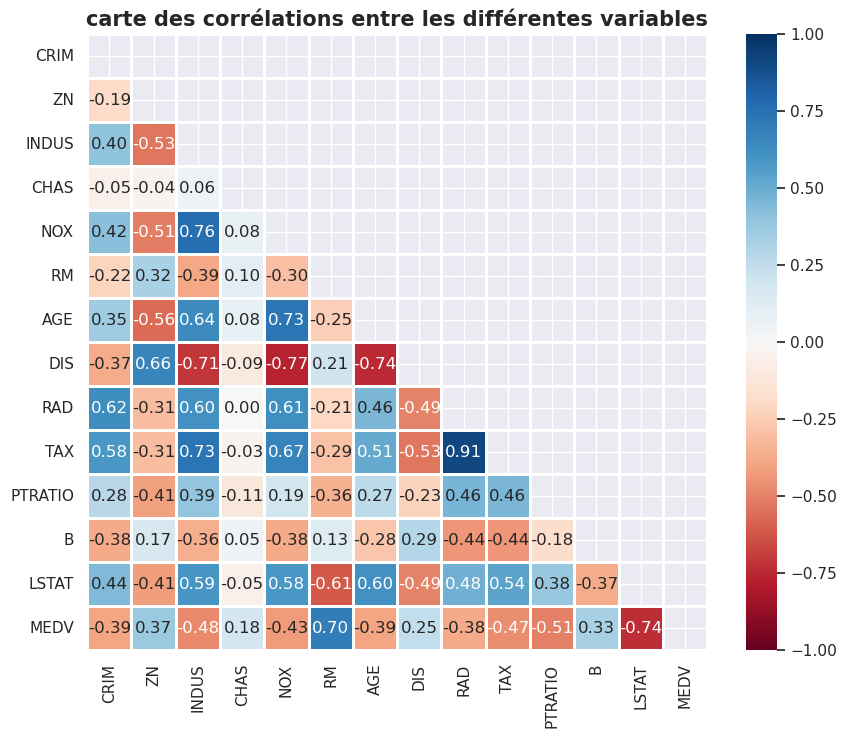

In [8]:
#carte des corrélations
sns.set(rc={'figure.figsize':(10,8)})
mask= np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot= True, fmt='.2f', vmin=-1, vmax=1)
plt.title('carte des corrélations entre les différentes variables', fontsize=15, fontweight='bold')
plt.show()


<p>
<ul>
<li>RM (0.70) : Corrélation positive élevée. Plus le nombre de pièces est important, plus la valeur médiane des maisons est élevée.
<li>LSTAT (-0.74) : Corrélation négative forte. Plus le pourcentage de population à faible statut socio-économique est élevé, plus la <li>valeur médiane des maisons diminue.
<li>PTRATIO (-0.51) : Corrélation négative modérée. Une augmentation du ratio élèves/professeurs est associée à une baisse de la valeur médiane des maisons.
<li>TAX (-0.47) : Corrélation négative modérée. Des taxes foncières plus élevées sont liées à des valeurs médianes plus basses.
<li>NOX (-0.43) : Corrélation négative modérée. Une concentration plus élevée en oxydes d'azote est associée à des valeurs médianes plus faibles.
<li>DIS (0.25) : Corrélation faible positive. Une plus grande distance des centres d'emploi est légèrement associée à une augmentation des valeurs médianes.
<li>CRIM (-0.39) : Corrélation négative faible. Un taux de criminalité plus élevé est associé à une baisse des valeurs médianes des maisons.
</ul>
Globalement, les variables liées à la qualité de vie (RM, LSTAT, PTRATIO, etc.) ont un impact significatif sur la valeur médiane des maisons(MEDV).
</p>

<h1 style="font-family: 'Georgia', serif;  font-size: 25px; color:rgb(219, 80, 52); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">
<ul>
<li style="list-style-type: square">Distribution des variables
</li>
</ul>
</h1>
<br/>

Nous pouvons visualiser d'un seul coup la distribution de chaque variable :

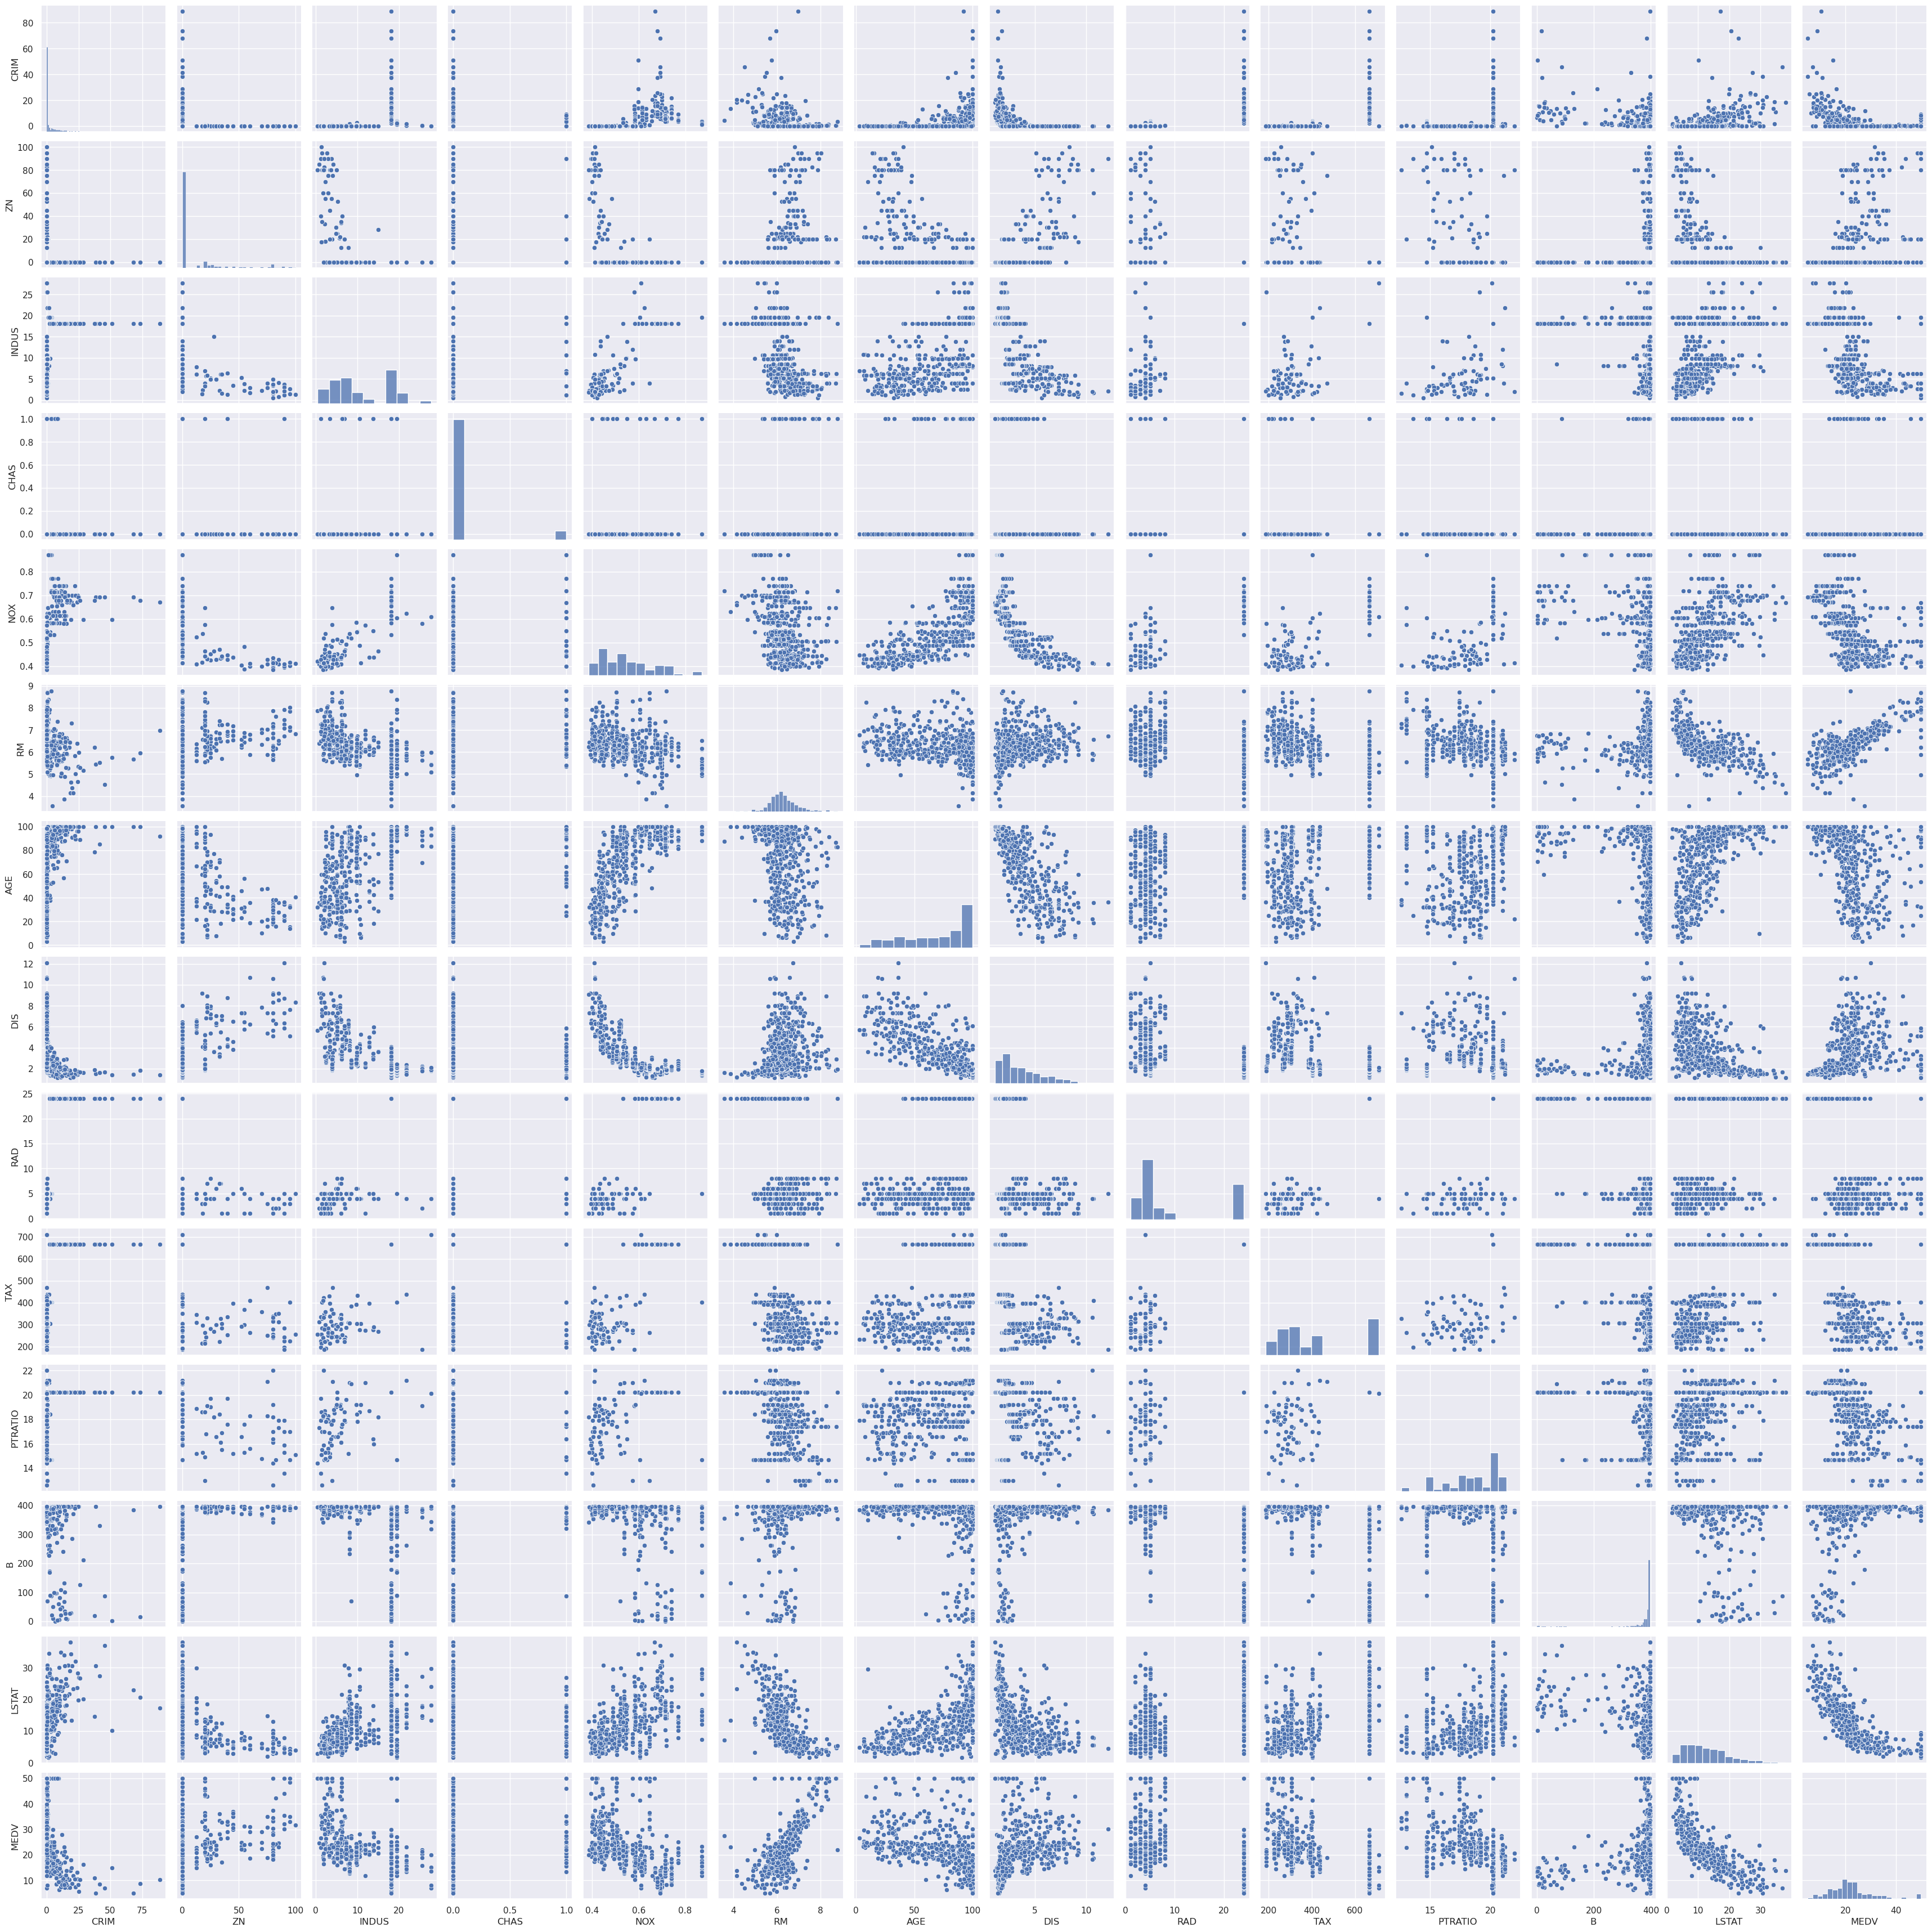

In [9]:
sns.pairplot(df)
plt.show()

<p>
Nous avons ci-dessus les relations par paires de variables un peu comme avec la matrice des corrélations.
</p>

/tmp/ipykernel_115965/901258496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'])


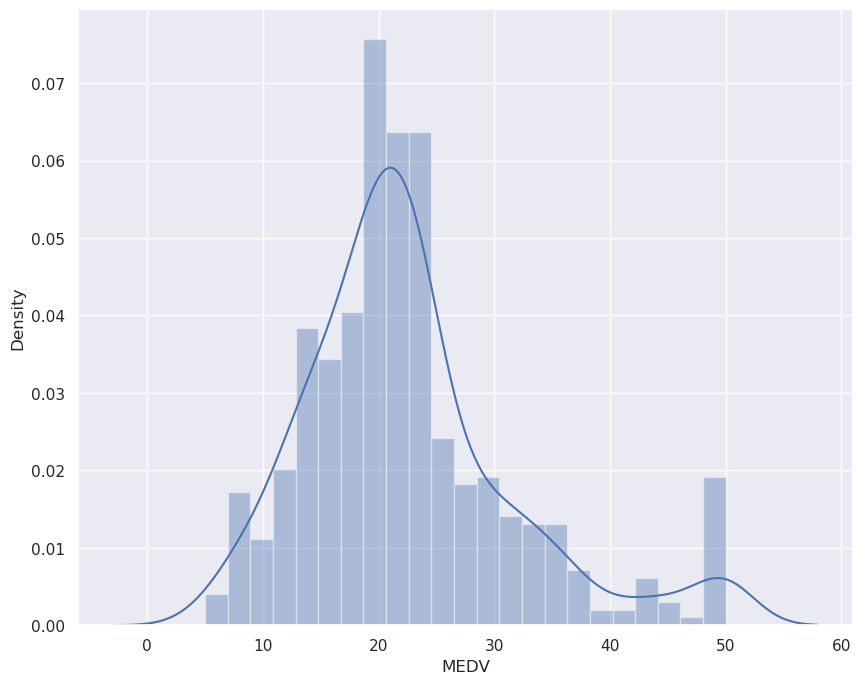

In [10]:
#histogramme de la variable cible
sns.distplot(df['MEDV'])
plt.show()

<p>
Nous constatons que la distribution de la variable cible suit quasiment une loi normale, ce qui peut s'avérer très utile car la plupart des algorithmes de machine Learning sont conçus selon les hypothèses de normalité sur les variables d'entrées. Si ce n'est pas le cas cela peut  affecter la qualité du modèle et conduire à de mauvaises prédictions.
</p>
<p>
Nous allon à présent calculer les dégrés d'asymétrie. Une distribution normale a un dégré d'asymétrie égal à 0.
</p>

In [11]:
#cacul des degré d'asymetrie
df.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.582470
INDUS      0.303722
RM         0.403612
TAX        0.669956
NOX        0.729308
LSTAT      0.908892
RAD        1.004815
DIS        1.011781
MEDV       1.108098
ZN         2.256613
CHAS       3.382293
CRIM       5.212843
dtype: float64

<p>
Les variables ayants les plus forts degrés d'asymétrie sont : ZN( proportion de terrains résidentiels zonés pour les lots de plus de 25000 sq.ft), CHAS(variable fictive de Charles River égale à 1 si la zone délimite la rivière et 0 sinon),  B(une transformation de la proportion de résidents noirs dans une ville), et CRIM(taux de criminalité par habitant par ville)
</p>
<p>
afin de réduire cette asymétrie et améliorer la linéarité du modèle nous allons faire une transformation logarithmique des variables présentant un fort degré d'asymétrie
</p>

In [12]:
#transformation logarithmique des variables présentant un fort degré d'asymétrie
df['CRIM']=np.log(df['CRIM'])
df['RAD']=np.log(df['RAD'])
df['DIS']=np.log(df['DIS'])
df['MEDV']=np.log(df['MEDV'])
df['CHAS']=np.log(df['CHAS'] +1) #car c'est <1
df['ZN']=np.log(df['ZN'] +1)


In [13]:
#recacul des degré d'asymetrie
df.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.582470
MEDV      -0.330321
DIS        0.152730
RAD        0.286617
INDUS      0.303722
RM         0.403612
CRIM       0.414770
TAX        0.669956
NOX        0.729308
LSTAT      0.908892
ZN         1.230834
CHAS       3.382293
dtype: float64

<p>
La variable CHAS sera supprimée à cause de son degré d'asymétrie trop élevé par rapport aux autres
</p>

In [14]:
df.drop('CHAS',axis= 1, inplace = True)

<p>
Une nouvelle carte des corrélations sera tracée afin de voir si les relations linéaires se sont renforcées ou pas après la transformation logarithmique de certaines variables
</p>

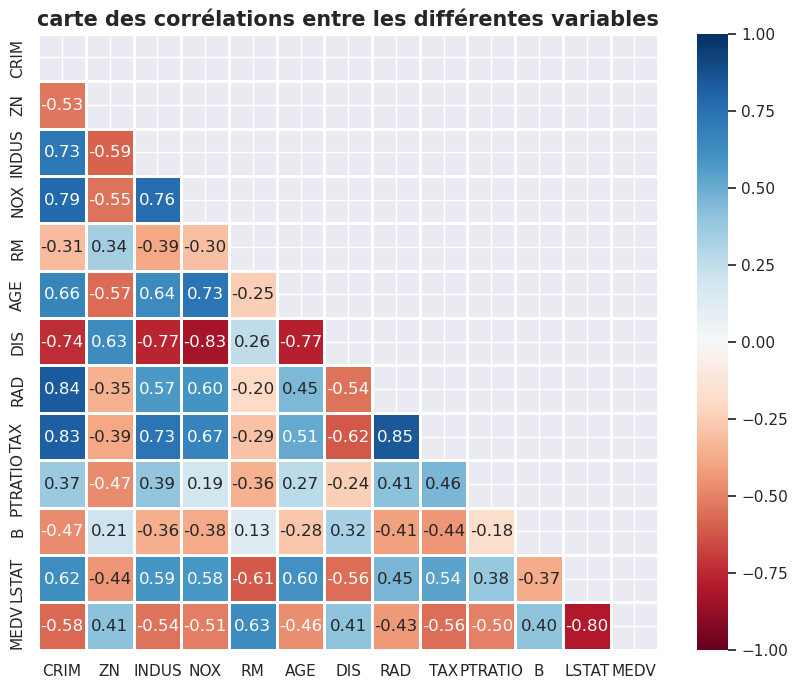

In [15]:
#carte des corrélations
sns.set(rc={'figure.figsize':(10,8)})
mask= np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot= True, fmt='.2f', vmin=-1, vmax=1)
plt.title('carte des corrélations entre les différentes variables', fontsize=15, fontweight='bold')
plt.show()


<p>
il y'a effectivement renforcement de la linéarité. Par exemple,  'CRIM' et 'MEDV' sont plus corrélés (-0,39 à -0,58) , et c'est aussi le cas entre MEDV et les autres variables

In [17]:
df.to_csv('HousingTreated.csv', index=False)